---
# MLUL1 Group Assignment: Problem 2

**Project:** Sectoral Segmentation 

**Team Members:**
* *Ritik Patel (12510034)*
* *Shafi Mohammed (12510087)*
* *Arathe Sankar (12510008)*
* *Aushak Anuj Dendukuri (12510089)*

**Problem Description:**
The objective is to identify a particular industry segment, select ~50 companies, analyze their performance based on the financial results, segment them accordingly.


## Here we are analysing and segmenting the top 50 companies from the FMCG/CPG industry. We have limited the analysis to large and mid-cap companies only.

 #### 1. Extract the Yearly Financial Statements of these companies from Yahoo Finance using the 'yfinance' Python library
 #### 2. Process the data to extract the relevant fields and then consolidate them into a Pandas Dataframe
 #### 3. Create the required features (Financial Ratios) from the consolidated data for each company
 #### 4. Perform EDA on the Features Dataset, identify the outliers and the relationship between the variables
 #### 5. Perform Segmentation using K-Means Clustering, using 'Elbow method', 'Silhouette Analysis' and 'CH index' to arrive at an optimal number of clusters
 #### 6. Ranking Feature Contribution using F-score
 #### 7. Perform Agglomerative clustering
 #### 8. Finding Outliers 
 ####  9. Understanding the various segments based on their financial performance

 ## 1. Extracting the financial statements of the identified companies


### List of Companies

**Large-Cap Examples (~25 companies):**

Procter & Gamble (PG),  Nestlé S.A. (NESN.SW), Unilever (UL), The Coca-Cola Company (KO), PepsiCo, Inc. (PEP), Mondelez International (MDLZ), Colgate-Palmolive (CL), Danone S.A. (BN.PA), Reckitt Benckiser Group (RKT.L), Kimberly-Clark Corporation (KMB), L'Oréal S.A. (OR.PA), Estée Lauder Companies (EL), Diageo plc (DGE.L), Anheuser-Busch InBev (BUD), Kraft Heinz Co. (KHC)

**Mid-Cap Examples (~25 companies):**

The Clorox Company (CLX), Church & Dwight Co., Inc. (CHD), The Hershey Company (HSY), General Mills, Inc. (GIS), Kellanova (K) (Formerly Kellogg's), Conagra Brands (CAG), J.M. Smucker Company (SJM), McCormick & Company (MKC), Brown-Forman Corporation (BF.B), Campbell Soup Company (CPB), Hostess Brands (TWNK), Coty Inc. (COTY), Edgewell Personal Care (EPC), Energizer Holdings (ENR), Herbalife Nutrition (HLF)

In [2]:
# Install the yfinance package, which provides access to Yahoo Finance data
# This package allows downloading historical market data, financial statements, and more
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing the necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
import os
import time
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
#Suppressing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:

# List of ~50 Large and Mid Cap FMCG/CPG companies
tickers = [
    # Large-Caps
    "PG", "NESN.SW", "KO", "PEP", "UL", "OR.PA", "PM", "DEO", "BUD", "MDLZ", 
    "BTI", "MO", "CL", "EL", "KMB", "STZ", "BN.PA", "KDP", "GIS", "KHC", 
    "MNST", "HLN", "HSY", "RKT.L", "RI.PA", "K",

    # Mid-Caps
    "CLX", "CHD", "HRL", "SJM", "MKC", "BF-B", "LW", "TAP", "CPB", "CAG", 
    "ELF", "POST", "BRBR", "COTY", "REYN", "EPC", "SMPL", "THS", "TWNK", 
    "COCO", "BGS", "ENR", "WDFC", "CENT", "SOVO", "SPB"
]
#Creating a directory to save the extracted financial information 
# and related files
output_dir = "yearly_financial_statements"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory : {output_dir}")

#Looping through the tickers and fetching the data
for ticker in tickers:
    print(f"-----Fetching data for company : {ticker}")
    try:
        company = yf.Ticker(ticker)

        balance_sheet = company.balance_sheet
        income_statement = company.financials
        cash_flow = company.cashflow
   
        #skipping if data is not present for a company
        if balance_sheet.empty or income_statement.empty :
            print(f"No data found for {ticker}. Skipping.")
            continue

        output_path = os.path.join(output_dir, ticker)
        if not os.path.exists(output_path):
            os.makedirs(output_path)

        balance_sheet.to_csv(os.path.join(output_path, f"{ticker}_annual_balance_sheet.csv"))
        income_statement.to_csv(os.path.join(output_path, f"{ticker}_annual_income_statement.csv"))
        cash_flow.to_csv(os.path.join(output_path, f"{ticker}_annual_cash_flow.csv"))

        print(f"Successfully downloaded and saved financial statements for {ticker}")

    except Exception as e:
        print(f"An error occurred for ticker {ticker}: {e}")

    # Add a small delay to ensure the requests are lined up nicely
    time.sleep(3)

print("\n--- Data extraction complete! ---")
print(f"All files are saved in the '{output_dir}' directory.")
            

-----Fetching data for company : PG
Successfully downloaded and saved financial statements for PG
-----Fetching data for company : NESN.SW
Successfully downloaded and saved financial statements for NESN.SW
-----Fetching data for company : KO
Successfully downloaded and saved financial statements for KO
-----Fetching data for company : PEP
Successfully downloaded and saved financial statements for PEP
-----Fetching data for company : UL
Successfully downloaded and saved financial statements for UL
-----Fetching data for company : OR.PA
Successfully downloaded and saved financial statements for OR.PA
-----Fetching data for company : PM
Successfully downloaded and saved financial statements for PM
-----Fetching data for company : DEO
Successfully downloaded and saved financial statements for DEO
-----Fetching data for company : BUD
Successfully downloaded and saved financial statements for BUD
-----Fetching data for company : MDLZ
Successfully downloaded and saved financial statements for

## 2. Consolidating the extracted data 

In [6]:

# Using the same tickers list from your data extraction script
tickers = [
    # Large-Caps
    "PG", "NESN.SW", "KO", "PEP", "UL", "OR.PA", "PM", "DEO", "BUD", "MDLZ", 
    "BTI", "MO", "CL", "EL", "KMB", "STZ", "BN.PA", "KDP", "GIS", "KHC", 
    "MNST", "HLN", "HSY", "RKT.L", "RI.PA", "K",

    # Mid-Caps
    "CLX", "CHD", "HRL", "SJM", "MKC", "BF-B", "LW", "TAP", "CPB", "CAG", 
    "ELF", "POST", "BRBR", "COTY", "REYN", "EPC", "SMPL", "THS", "TWNK", 
    "COCO", "BGS", "ENR", "WDFC", "CENT", "SOVO", "SPB"
]
data_dir = "yearly_financial_statements"

# Expanded list of metrics from both Balance Sheet and Income Statement
bs_metrics = [
    'Total Assets', 'Current Assets', 'Inventory', 
    'Total Liabilities Net Minority Interest', 'Current Liabilities', 'Stockholders Equity'
]
is_metrics = [
    'Net Income', 'Total Revenue', 'EBIT', 'Interest Expense', 'Basic EPS','Cost Of Revenue'
]

consolidated_data = []

# Iterating for each ticker
for ticker in tickers:
    try:
        # Define file paths
        bs_path = os.path.join(data_dir, ticker, f"{ticker}_annual_balance_sheet.csv")
        is_path = os.path.join(data_dir, ticker, f"{ticker}_annual_income_statement.csv")
        
        # Read the annual data
        bs_df = pd.read_csv(bs_path, index_col=0)
        is_df = pd.read_csv(is_path, index_col=0)

        # Get the two most recent years (Y2 = most recent, Y1 = previous)
        latest_year_bs = bs_df.iloc[:, 0]
        previous_year_bs = bs_df.iloc[:, 1]
        latest_year_is = is_df.iloc[:, 0]
        previous_year_is = is_df.iloc[:, 1]
        
        # Consolidate all metrics into a single dictionary
        company_metrics = {'Ticker': ticker }
        for metric in bs_metrics:
            company_metrics[f"{metric}_Y2"] = latest_year_bs.get(metric)
            company_metrics[f"{metric}_Y1"] = previous_year_bs.get(metric)
       
        for metric in is_metrics:
            company_metrics[f"{metric}_Y2"] = latest_year_is.get(metric)
            company_metrics[f"{metric}_Y1"] = previous_year_is.get(metric)
            
        consolidated_data.append(company_metrics)
        #print(consolidated_data)
    
    except Exception as e:
        print(f"Could not process {ticker}: {e}")

# Create the final DataFrame and clean it
df = pd.DataFrame(consolidated_data)
#df.dropna(inplace=True) # Drop companies with any missing data
df.set_index('Ticker', inplace=True)

print("Consolidated DataFrame with two years of data:")
print(df.head())

Could not process TWNK: [Errno 2] No such file or directory: 'yearly_financial_statements\\TWNK\\TWNK_annual_balance_sheet.csv'
Could not process SOVO: [Errno 2] No such file or directory: 'yearly_financial_statements\\SOVO\\SOVO_annual_balance_sheet.csv'
Consolidated DataFrame with two years of data:
         Total Assets_Y2  Total Assets_Y1  Current Assets_Y2  \
Ticker                                                         
PG          1.252310e+11     1.223700e+11       2.539200e+10   
NESN.SW     1.392640e+11     1.265500e+11       3.518800e+10   
KO          1.005490e+11     9.770300e+10       2.599700e+10   
PEP         9.946700e+10     1.004950e+11       2.582600e+10   
UL          7.975000e+10     7.526600e+10       1.919400e+10   

         Current Assets_Y1  Inventory_Y2  Inventory_Y1  \
Ticker                                                   
PG            2.470900e+10  7.551000e+09  7.016000e+09   
NESN.SW       3.085700e+10  1.326000e+10  1.189600e+10   
KO            2.

In [7]:
df.head()

,Total Assets_Y2,Total Assets_Y1,Current Assets_Y2,Current Assets_Y1,Inventory_Y2,Inventory_Y1,Total Liabilities Net Minority Interest_Y2,Total Liabilities Net Minority Interest_Y1,Current Liabilities_Y2,Current Liabilities_Y1,...,Total Revenue_Y2,Total Revenue_Y1,EBIT_Y2,EBIT_Y1,Interest Expense_Y2,Interest Expense_Y1,Basic EPS_Y2,Basic EPS_Y1,Cost Of Revenue_Y2,Cost Of Revenue_Y1
Ticker,,,,,,,,,,,,,,,,,,,,,
PG,1.252310e+11,1.223700e+11,2.539200e+10,2.470900e+10,7.551000e+09,7.016000e+09,7.294700e+10,7.181200e+10,3.605800e+10,3.362700e+10,...,8.428400e+10,8.403900e+10,2.107400e+10,1.968600e+10,9.070000e+08,9.250000e+08,6.670000,6.180000,4.116400e+10,4.084800e+10
NESN.SW,1.392640e+11,1.265500e+11,3.518800e+10,3.085700e+10,1.326000e+10,1.189600e+10,1.025710e+11,9.016300e+10,4.286300e+10,3.708400e+10,...,9.172000e+10,9.335100e+10,1.508000e+10,1.434600e+10,1.841000e+09,1.643000e+09,4.190000,4.240000,4.867000e+10,5.032800e+10
KO,1.005490e+11,9.770300e+10,2.599700e+10,2.673200e+10,4.728000e+09,4.424000e+09,7.417700e+10,7.022300e+10,2.524900e+10,2.357100e+10,...,4.706100e+10,4.575400e+10,1.474200e+10,1.447900e+10,1.656000e+09,1.527000e+09,2.470000,2.480000,1.832400e+10,1.852000e+10
PEP,9.946700e+10,1.004950e+11,2.582600e+10,2.695000e+10,5.306000e+09,5.334000e+09,8.129600e+10,8.185800e+10,3.153600e+10,3.164700e+10,...,9.185400e+10,9.147100e+10,1.286500e+10,1.223600e+10,9.190000e+08,8.190000e+08,6.981105,6.604076,4.174400e+10,4.188100e+10
UL,7.975000e+10,7.526600e+10,1.919400e+10,1.790200e+10,5.177000e+09,5.119000e+09,5.719500e+10,5.450200e+10,2.523400e+10,2.350700e+10,...,6.076100e+10,5.960400e+10,9.987000e+09,1.041400e+10,1.118000e+09,1.075000e+09,2.300000,2.580000,3.339100e+10,3.442900e+10


## 3. Feature Engineering

In [8]:
# Creating an empty DataFrame with the same index as the original dataframe to store financial ratios
features_df = pd.DataFrame(index = df.index)

#------ Profitability Ratios 
features_df['ROE'] = df['Net Income_Y2'] / df['Stockholders Equity_Y2']
features_df['ROA'] = df['Net Income_Y2'] / df['Total Assets_Y2']

#----- Liquidity Ratios
features_df['Current_Ratio'] = df['Current Assets_Y2'] / df['Current Liabilities_Y2']
features_df['Quick_Ratio'] = (df['Current Assets_Y2'] - df['Inventory_Y2'] )/ df['Current Liabilities_Y2']

#------Growth Ratios
features_df['Revenue_Growth'] = (df['Total Revenue_Y2'] - df['Total Revenue_Y1']) / df['Total Revenue_Y1']
features_df['EPS_Growth'] = (df['Basic EPS_Y2'] - df['Basic EPS_Y1']) / abs(df['Basic EPS_Y1'])

#------ Efficiency Ratios
features_df['Asset Turnover'] = df['Total Revenue_Y2'] / df['Total Assets_Y2']
features_df['Inventory Turnover'] = df['Cost Of Revenue_Y2'] / df['Inventory_Y2']

#------ FMCG Industry Specific Metric
# Gross Profit Margin: Measures a Company's profitability at the most fundamental level: the sale of its products

features_df['Gross Profit Margin'] = ((df['Total Revenue_Y2'] - df['Cost Of Revenue_Y2'])/df['Total Revenue_Y2'])*100

features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remove rows with missing values
#features_df.dropna(inplace=True)
features_df.head()

,ROE,ROA,Current_Ratio,Quick_Ratio,Revenue_Growth,EPS_Growth,Asset Turnover,Inventory Turnover,Gross Profit Margin
Ticker,,,,,,,,,
PG,0.307121,0.127556,0.704199,0.494786,0.002915,0.079288,0.673028,5.451463,51.160363
NESN.SW,0.303032,0.078154,0.820941,0.511583,-0.017472,-0.011792,0.658605,3.670437,46.936328
KO,0.427704,0.105730,1.029625,0.842370,0.028566,-0.004032,0.468040,3.875635,61.063301
PEP,0.530902,0.096293,0.818937,0.650685,0.004187,0.057090,0.923462,7.867320,54.553966
UL,0.287344,0.072025,0.760640,0.555481,0.019411,-0.108527,0.761893,6.449874,45.045342


## 4. EDA for the dataset

We have selected 8 key ratios that provide a balanced view of company performance:

 - ROE (Return on Equity): Measures how much profit a company generates for each dollar of shareholders' equity. It's a core measure of profitability for investors.

 - ROA (Return on Assets): Shows how efficiently a company is using its assets to generate profit.

 - Current Ratio: A liquidity measure of a company's ability to pay its short-term obligations (due within one year).

 - Quick Ratio: Measures a company's ability to meet its short-term obligations using only its most liquid assets. It offers a more conservative view of liquidity by excluding inventory.

 - Revenue Growth: The year-over-year percentage increase in a company's sales. A primary indicator of growth.

 - EPS Growth: The year-over-year percentage increase in earnings per share. It shows how much more (or less) profit is being allocated to each share of stock.

 - Asset Turnover: An efficiency ratio that measures how effectively a company uses its assets to generate revenue.

 - Inventory Turnover: Shows how many times a company has sold and replaced its inventory during a given period. Higher is generally better.

 - Gross Profit Margin: It measures a company's profitability at the most fundamental level: the sale of its products. It calculates the percentage of revenue left after subtracting the Cost of Goods Sold (COGS). For the CPG/FMCG industry, this metric is particularly powerful because it directly reflects a company's brand strength and pricing power.


Generating EDA plots...


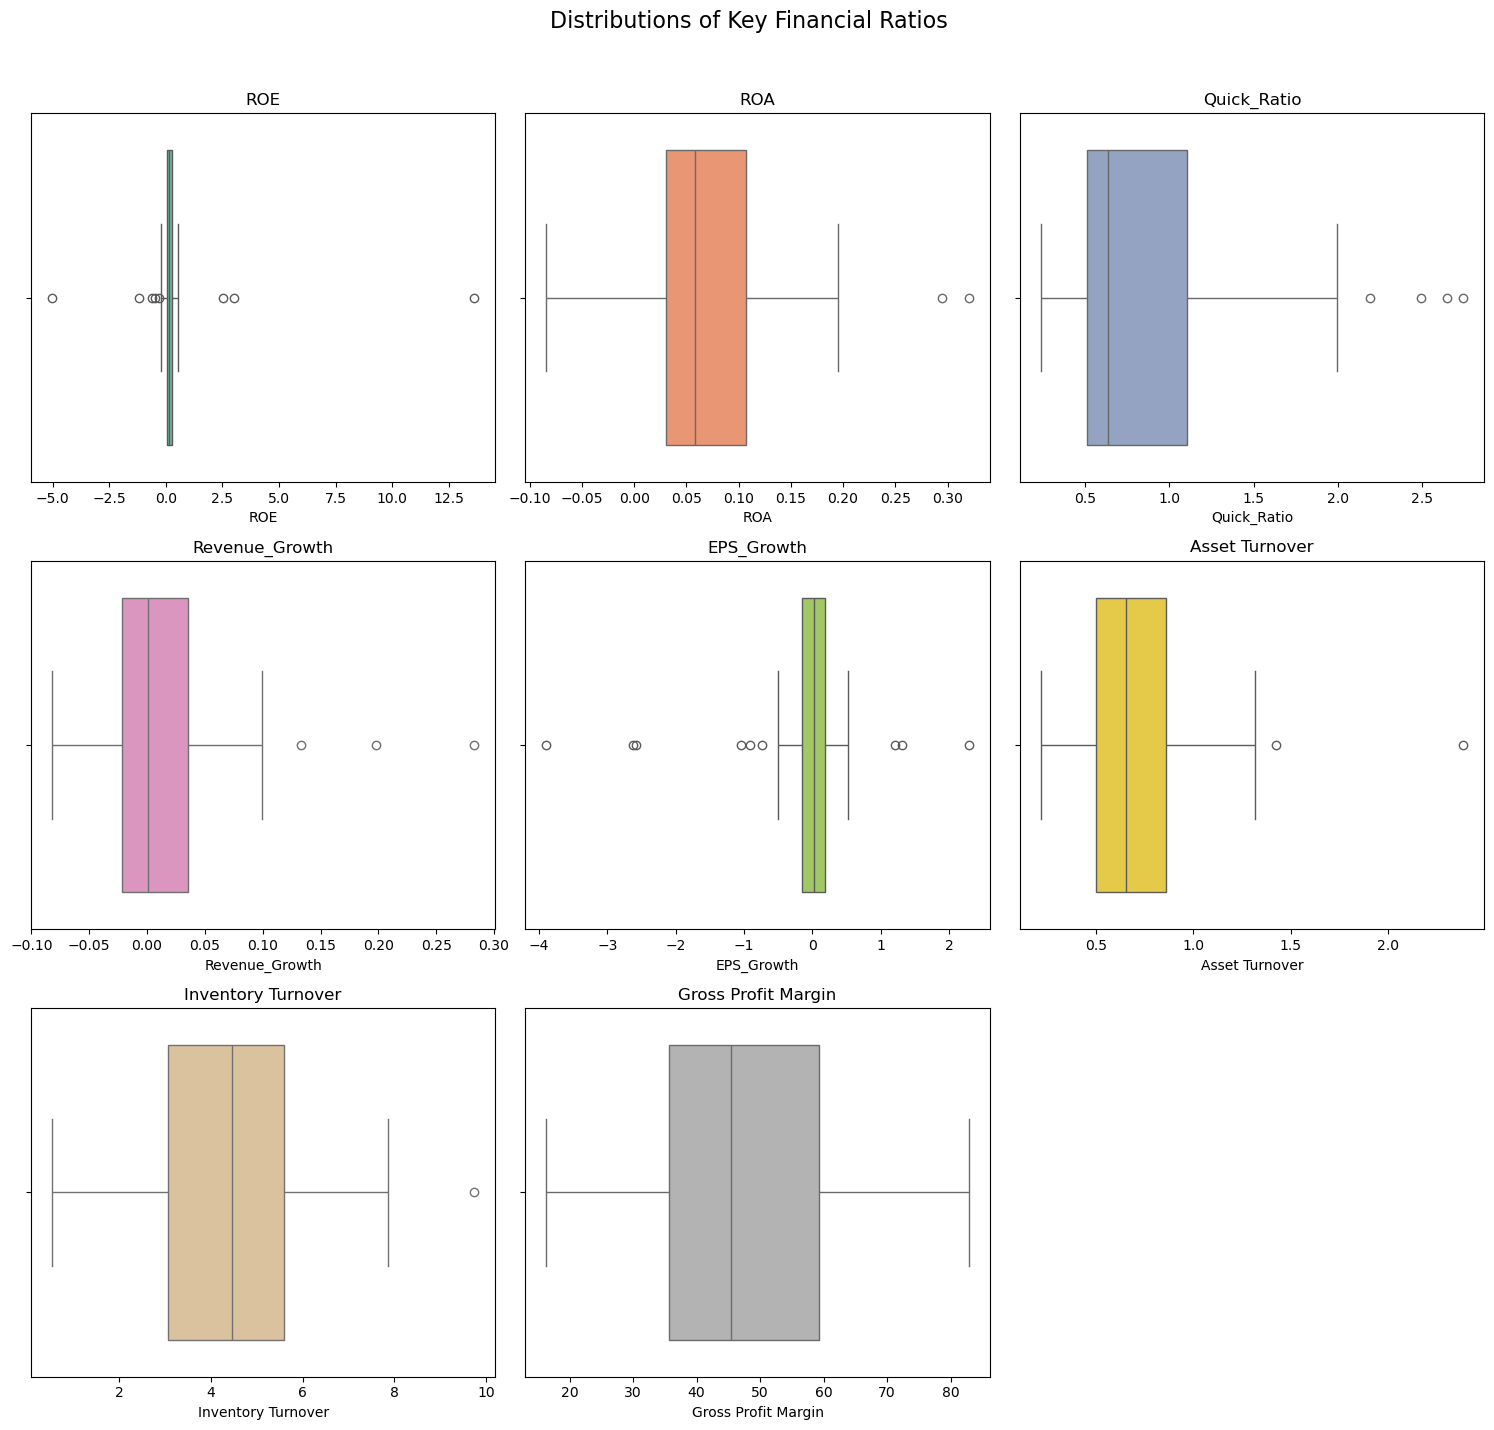

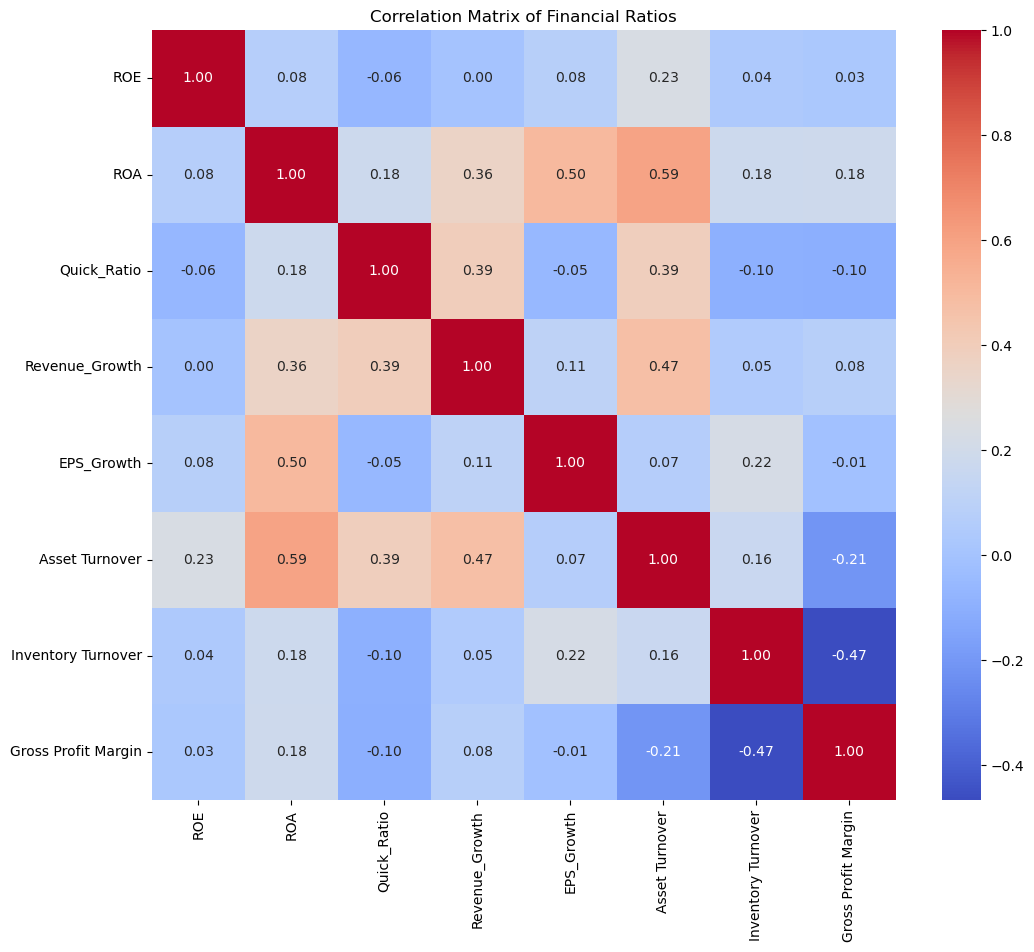

EDA plots saved.


In [9]:
from sklearn.preprocessing import StandardScaler
import  matplotlib

# Limiting the ratios to 8. Conidering only 'Quick Ratio' and not 'Current Ratio' as they are fairly similar
features_df_eda = features_df[['ROE', 'ROA', 'Quick_Ratio','Revenue_Growth', 
    'EPS_Growth', 'Asset Turnover', 'Inventory Turnover', 'Gross Profit Margin']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df_eda)

#Creating a Dataframe with scaled features
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns = features_df_eda.columns)
features_df.head()
scaled_df.head()


print("\nGenerating EDA plots...")
num_features = len(features_df_eda.columns)
num_rows = (num_features + 2) // 3  # Calculate rows needed (ceiling division)
num_cols = min(3, num_features)  # Use 3 columns or fewer if needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Distributions of Key Financial Ratios', fontsize=16)

# Flatten the axes array if it's multi-dimensional
if num_rows > 1:
    axes = axes.flatten()

for i, col in enumerate(features_df_eda.columns):
    if num_rows == 1:
        ax = axes[i]
    else:
        ax = axes[i]
    sn.boxplot(ax=ax, x=features_df_eda[col], color=sn.color_palette("Set2")[i % 9])
    ax.set_title(col)
    
# Hide any unused subplots
if num_rows > 1:
    for j in range(num_features, num_rows * num_cols):
        axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('ratio_distributions.png')
plt.show()
plt.close()


plt.figure(figsize=(12, 10))
sn.heatmap(features_df_eda.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Ratios')
plt.savefig('ratio_correlation_heatmap.png')
plt.show()
plt.close()
print("EDA plots saved.")


### Inference from the EDA 
1. Profitability (ROE and ROA) : Both ratios show a wide distribution. Most companies are profitable, but there are significant outliers on both ends, indicating a large performance gap between the top-tier profitable companies and those that are struggling. -ve outliers in ROA suggest some firms are not effectively using their assets to generate profit.
2. Liquidity (Current and Quick Ratio) : The liquidity ratios have a right-skewed distribution, with several high-end outliers. These outliers represent companies holding a large cash reserve or liquid assets relative to their short-term debts. This shows conservative mindset of inefficient capital allocation.
3. Growth (Revenue and EPS Growth) : The median for both growth ratios is in the lower single digits. Extreme outliers on both sides show volatility, with a number of high-growth challengers and struggling companies.
4. Efficiency (Asset and Inventory Turnover): These metrics show a relatively tight distribution with a few high-performing outliers. This suggests that while most companies operate at a similar level of efficiency, a small number of firms are exceptionally good at converting their inventory and assets into sales.


### Correlation between different features
1. ROE and ROA have a strong positive correlation, confirming that companies that are efficient at using their assets to generate profit are also effective at delivering returns to shareholders (ROE).
2. Asset Turnover and ROA have a moderate positive correlation. This shows that efficiency is a key component of profitability.
3. Revenue Growth vs. ROA : Revenue growth of the company has a moderate relationship with the profitability (ROA). This means the companies are not showing revenue growth by cutting margins. This depicts a healthy and well-managed business
4. Inventory Turnover is negatively correlated to 'Gross Profit Margin', highlighting the classic strategy trade-off between volume and price. "Low-cost, high-volume" strategy tends to have lower gross profit margins

## 5. Clustering using K-means

### Scaling the data for Clustering

In [10]:
features_df.head()

,ROE,ROA,Current_Ratio,Quick_Ratio,Revenue_Growth,EPS_Growth,Asset Turnover,Inventory Turnover,Gross Profit Margin
Ticker,,,,,,,,,
PG,0.307121,0.127556,0.704199,0.494786,0.002915,0.079288,0.673028,5.451463,51.160363
NESN.SW,0.303032,0.078154,0.820941,0.511583,-0.017472,-0.011792,0.658605,3.670437,46.936328
KO,0.427704,0.105730,1.029625,0.842370,0.028566,-0.004032,0.468040,3.875635,61.063301
PEP,0.530902,0.096293,0.818937,0.650685,0.004187,0.057090,0.923462,7.867320,54.553966
UL,0.287344,0.072025,0.760640,0.555481,0.019411,-0.108527,0.761893,6.449874,45.045342


In [11]:
from sklearn.preprocessing import StandardScaler

# Scaling the data using Standard Scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Creating a Dataframe with scaled features
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns = features_df.columns)
scaled_df.head()

,ROE,ROA,Current_Ratio,Quick_Ratio,Revenue_Growth,EPS_Growth,Asset Turnover,Inventory Turnover,Gross Profit Margin
Ticker,,,,,,,,,
PG,-0.029389,0.718817,-0.806003,-0.654967,-0.184286,0.213262,-0.134340,0.532123,0.298483
NESN.SW,-0.031322,0.071382,-0.688371,-0.628089,-0.508494,0.114720,-0.173846,-0.363008,0.028702
KO,0.027603,0.432771,-0.478095,-0.098794,0.223625,0.123116,-0.695819,-0.259877,0.930965
PEP,0.076380,0.309106,-0.690390,-0.405511,-0.164061,0.189246,0.551619,1.746314,0.515226
UL,-0.038737,-0.008936,-0.749131,-0.557849,0.078046,0.010061,0.109069,1.033917,-0.092072


In [12]:
# Installing YellowBrick package
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


### Using Elbow Method to estimate the number of clusters

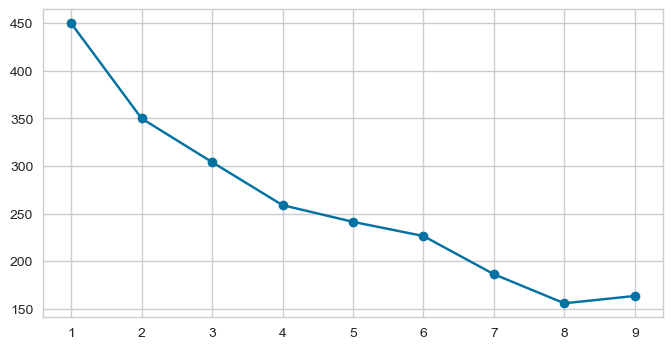

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Imputing values to replace NaN values before clustering
imputer = SimpleImputer(strategy='mean')
scaled_df = imputer.fit_transform(scaled_df)


# List to store inertia values for different cluster counts
inertia = []

# Define range of clusters to test (from 1 to 9)
cluster_range = range(1,10)
cluster_errors = []

# Perform K-means clustering for each number of clusters
for num_clusters in cluster_range:
    # Initialize K-means model with current number of clusters
    clusters = KMeans(num_clusters)
    # Fit the model to our scaled data
    clusters.fit(scaled_df)
    # Store the inertia (sum of squared distances to closest centroid)
    cluster_errors.append(clusters.inertia_)

# Create plot to visualize the Elbow Method
plt.figure(figsize = (8,4))
# Plot number of clusters vs inertia to find the "elbow point"
plt.plot(cluster_range, cluster_errors, marker = 'o')

### Silhouette Analysis


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Added import for SimpleImputer
import pandas as pd  # Added import for pandas

#features_df = df
# Create imputer and transform the data
imputer = SimpleImputer(strategy='mean')
features_array = imputer.fit_transform(features_df)  # This returns a numpy array

# Store the column names before they're lost
column_names = features_df.columns  # Save column names before scaling

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_array)

# Creating a Dataframe with scaled features
# Use the saved column names instead of features_df.columns
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=column_names)

scaled_df.head()

,ROE,ROA,Current_Ratio,Quick_Ratio,Revenue_Growth,EPS_Growth,Asset Turnover,Inventory Turnover,Gross Profit Margin
Ticker,,,,,,,,,
PG,-0.029389,0.718817,-0.806003,-0.654967,-0.184286,0.217659,-0.134340,0.532123,0.298483
NESN.SW,-0.031322,0.071382,-0.688371,-0.628089,-0.508494,0.117086,-0.173846,-0.363008,0.028702
KO,0.027603,0.432771,-0.478095,-0.098794,0.223625,0.125655,-0.695819,-0.259877,0.930965
PEP,0.076380,0.309106,-0.690390,-0.405511,-0.164061,0.193148,0.551619,1.746314,0.515226
UL,-0.038737,-0.008936,-0.749131,-0.557849,0.078046,0.010268,0.109069,1.033917,-0.092072


In [15]:
# Calculate the Silhouette Score
from sklearn.metrics import silhouette_score

# Select the relevant features 
x_features = ['ROE','ROA','Current_Ratio','Quick_Ratio','Revenue_Growth','EPS_Growth','Asset Turnover','Inventory Turnover', 'Gross Profit Margin']
silhouette_score(scaled_features,clusters.labels_)

np.float64(0.17434035689875732)

In [16]:

def visualize_silhouette_analysis(scaled_data, k_values=[4,5,6,7,8]):
    """
    Create silhouette visualizations for different cluster numbers using Yellowbrick.

    Parameters:
    scaled_data (pd.DataFrame): Scaled feature data
    k_values (list): List of k values to evaluate

    Returns:
    pd.DataFrame: Silhouette scores for each k value
    """
    n_clusters = len(k_values)
    n_cols = 2
    n_rows = (n_clusters + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten() if n_clusters > 1 else [axes]

    silhouette_results = []

    print("Silhouette Analysis Results:")
    print("-" * 40)

    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

        # Create silhouette visualizer
        visualizer = SilhouetteVisualizer(
            kmeans,
            colors='yellowbrick',
            ax=axes[i]
        )

        # Fit the visualizer and the model
        visualizer.fit(scaled_data)

        # Get silhouette score
        sil_score = visualizer.silhouette_score_
        silhouette_results.append({
            'n_clusters': k,
            'silhouette_score': sil_score
        })

        # Customize the plot
        axes[i].set_title(f'Silhouette Analysis (k={k}, score={sil_score:.3f})',
                         fontsize=12, fontweight='bold')

        print(f"k = {k:2d} | Silhouette Score: {sil_score:.3f}")

    # Hide empty subplots
    for j in range(n_clusters, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(silhouette_results)

Silhouette Analysis Results:
----------------------------------------
k =  4 | Silhouette Score: 0.190
k =  5 | Silhouette Score: 0.195
k =  6 | Silhouette Score: 0.185
k =  7 | Silhouette Score: 0.155
k =  8 | Silhouette Score: 0.189


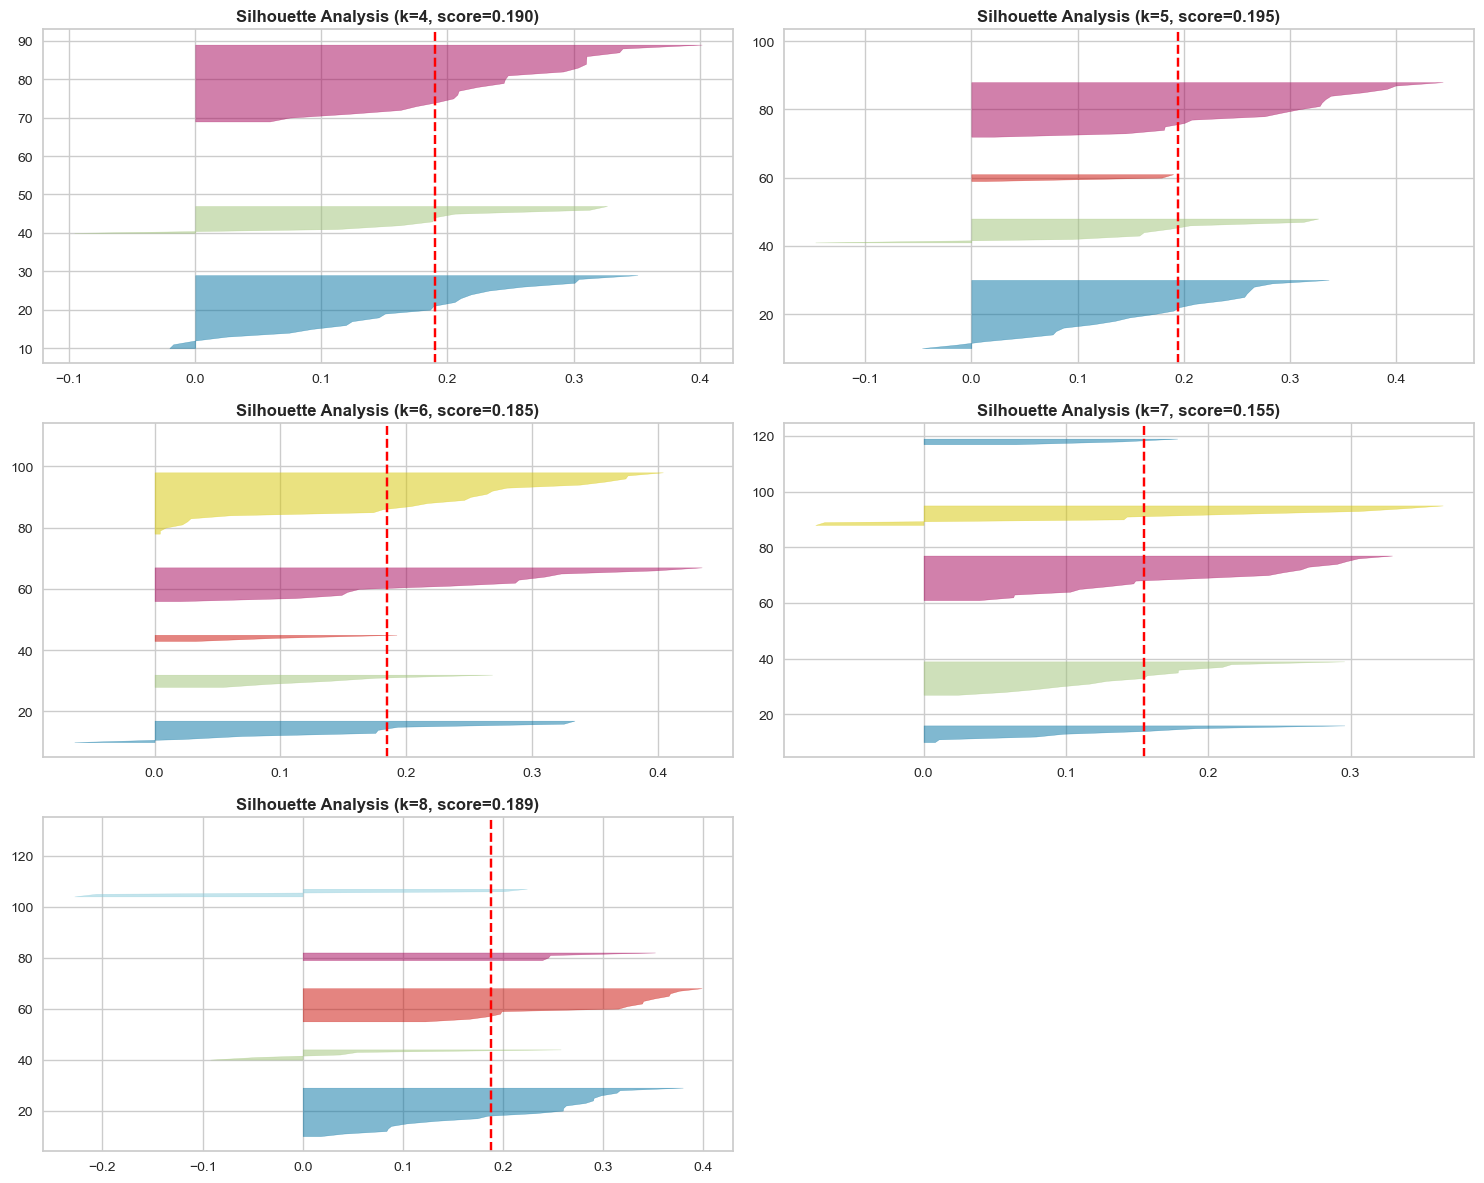

In [17]:
# Perform silhouette analysis with visualizations
from yellowbrick.cluster import SilhouetteVisualizer

silhouette_results = visualize_silhouette_analysis(scaled_df)

### Calinski-Harabasz Index

In [18]:
# Import necessary libraries
from sklearn.metrics import calinski_harabasz_score

# Define the range of cluster numbers (k) to evaluate.
# This will test k=4, 5, 6, 7, and 8
cluster_range = range( 4, 9 )
ch_scores = []

# Loop through each number of clusters in the specified range.
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, random_state = 42 )
  clusters.fit( scaled_df )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(scaled_df, clusters.labels_)}" )

n_cluster: 4 - CH Score: 10.108735446102502
n_cluster: 5 - CH Score: 8.315247365185648
n_cluster: 6 - CH Score: 9.984603406203025
n_cluster: 7 - CH Score: 9.97272941988225
n_cluster: 8 - CH Score: 11.380255180491478


In [19]:
def calculate_calinski_harabasz_scores(scaled_data, k_values=[4, 5, 6, 7,8]):
    """
    Calculate Calinski-Harabasz scores for different cluster numbers.

    Parameters:
    scaled_data (pd.DataFrame): Scaled feature data
    k_values (list): List of k values to evaluate

    Returns:
    pd.DataFrame: Calinski-Harabasz scores for each k value
    """
    ch_results = []

    print("\nCalinski-Harabasz Index Results:")
    print("-" * 40)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(scaled_data)

        ch_score = calinski_harabasz_score(scaled_data, labels)
        ch_results.append({
            'n_clusters': k,
            'calinski_harabasz_score': ch_score,
            'inertia': kmeans.inertia_
        })

        print(f"k = {k:2d} | Calinski-Harabasz Score: {ch_score:.2f}")

    # Create visualization
    ch_df = pd.DataFrame(ch_results)

    plt.figure(figsize=(10, 6))
    plt.plot(ch_df['n_clusters'], ch_df['calinski_harabasz_score'],
             marker='o', linewidth=2, markersize=8, color='darkgreen')
    plt.title('Calinski-Harabasz Index by Number of Clusters',
              fontsize=16, fontweight='bold')
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Calinski-Harabasz Index', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)

    # Annotate points
    for i, row in ch_df.iterrows():
        plt.annotate(f'{row["calinski_harabasz_score"]:.1f}',
                    (row['n_clusters'], row['calinski_harabasz_score']),
                    textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()

    return ch_df


Calinski-Harabasz Index Results:
----------------------------------------
k =  4 | Calinski-Harabasz Score: 12.33
k =  5 | Calinski-Harabasz Score: 12.47
k =  6 | Calinski-Harabasz Score: 12.36
k =  7 | Calinski-Harabasz Score: 11.66
k =  8 | Calinski-Harabasz Score: 11.38


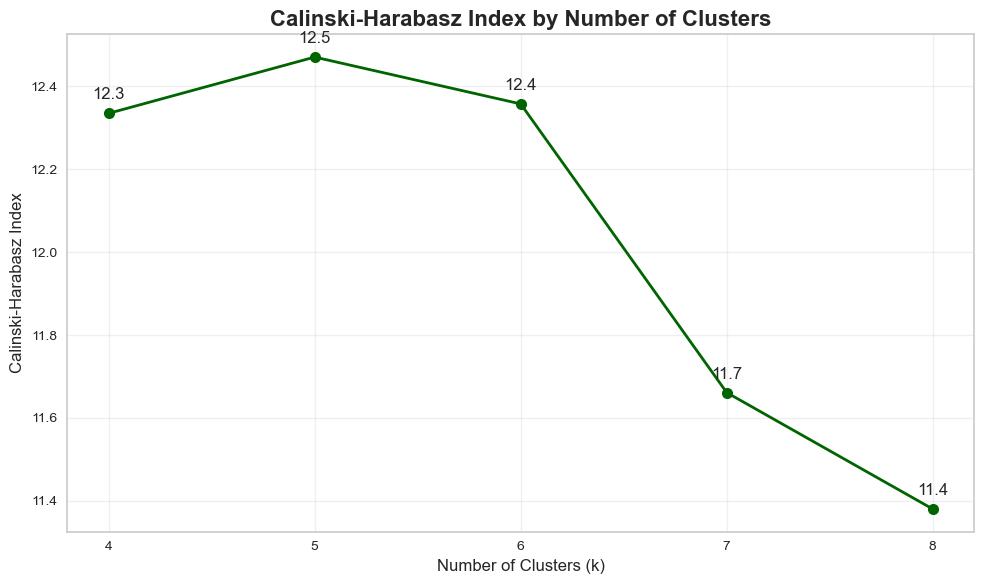


Combined Performance Results:


,n_clusters,silhouette_score,calinski_harabasz_score,inertia
0,4,0.190402,12.334888,249.383576
1,5,0.194699,12.470686,213.421317
2,6,0.184748,12.357645,187.166393
3,7,0.154596,11.661223,171.288451
4,8,0.188559,11.380255,155.348697


In [20]:
# Calculate Calinski-Harabasz scores
ch_results = calculate_calinski_harabasz_scores(scaled_df)

# Combine results
performance_results = pd.merge(silhouette_results, ch_results, on='n_clusters')
print("\nCombined Performance Results:")
performance_results

## From the Elbow method, Sihoutte analysis and C-H scores, the optimal cluster number is chosen as 5

In [21]:
# Set the number of clusters (k) to 5.
k = 5

# Fit the KMeans model to the data
clusters = KMeans(k, random_state= 42)
clusters.fit(scaled_features)
# Adding a new column, cluster_id to the dataframe
features_df["cluster_id"] = clusters.labels_

In [22]:
# Analysing the characteristics for each cluster

cluster_profiles = features_df.groupby('cluster_id').mean()
print(cluster_profiles)

                 ROE       ROA  Current_Ratio  Quick_Ratio  Revenue_Growth  \
cluster_id                                                                   
0           0.377441  0.062147       1.048302     0.618205        0.000851   
1          -0.010554  0.028721       3.439082     1.852110       -0.011577   
2           0.684080  0.073699       1.026035     0.612419       -0.003596   
3           0.089645  0.028528       2.361731     1.563552        0.133271   
4          -0.055656  0.177860       3.010731     2.069342        0.134886   

            EPS_Growth  Asset Turnover  Inventory Turnover  \
cluster_id                                                   
0             0.013570        0.684633            5.483881   
1            -0.747098        0.671112            3.272800   
2            -0.258989        0.552634            2.674619   
3             0.174664        0.616351            7.448687   
4             0.134753        1.429416            3.694348   

            Gross 

In [23]:
# Listing the companies in each cluster
for i in range(k):
    print(f"\n -----Companies in Cluster {i} ----")
    print(features_df[features_df['cluster_id'] == i].index.tolist())


 -----Companies in Cluster 0 ----
['PG', 'NESN.SW', 'PEP', 'UL', 'BUD', 'MDLZ', 'KMB', 'BN.PA', 'KDP', 'GIS', 'KHC', 'HSY', 'K', 'CLX', 'CHD', 'HRL', 'SJM', 'MKC', 'LW', 'TAP', 'CPB', 'CAG', 'REYN', 'EPC', 'THS', 'ENR']

 -----Companies in Cluster 1 ----
['BF-B', 'SMPL', 'BGS', 'CENT', 'SPB']

 -----Companies in Cluster 2 ----
['KO', 'OR.PA', 'PM', 'DEO', 'BTI', 'MO', 'CL', 'EL', 'STZ', 'HLN', 'RKT.L', 'RI.PA', 'COTY']

 -----Companies in Cluster 3 ----
['POST']

 -----Companies in Cluster 4 ----
['MNST', 'ELF', 'BRBR', 'COCO', 'WDFC']


## 6.Understanding Feature Contributions

In [24]:
# Adding features to the scaled dataframe

x_features = ['ROE','ROA','Current_Ratio','Quick_Ratio','Revenue_Growth','EPS_Growth','Asset Turnover','Inventory Turnover', 'Gross Profit Margin']
scaled_df = pd.DataFrame(scaled_df, columns = x_features)

In [25]:
scaled_df.head()

,ROE,ROA,Current_Ratio,Quick_Ratio,Revenue_Growth,EPS_Growth,Asset Turnover,Inventory Turnover,Gross Profit Margin
Ticker,,,,,,,,,
PG,-0.029389,0.718817,-0.806003,-0.654967,-0.184286,0.217659,-0.134340,0.532123,0.298483
NESN.SW,-0.031322,0.071382,-0.688371,-0.628089,-0.508494,0.117086,-0.173846,-0.363008,0.028702
KO,0.027603,0.432771,-0.478095,-0.098794,0.223625,0.125655,-0.695819,-0.259877,0.930965
PEP,0.076380,0.309106,-0.690390,-0.405511,-0.164061,0.193148,0.551619,1.746314,0.515226
UL,-0.038737,-0.008936,-0.749131,-0.557849,0.078046,0.010268,0.109069,1.033917,-0.092072


In [26]:
# Use an imputer to fill missing values
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Create an imputer (you can choose strategy based on your data)
imputer = SimpleImputer(strategy='mean')  # Other options: 'median', 'most_frequent', 'constant'

# Apply imputer to your data
imputed_df = imputer.fit_transform(scaled_df)

# Now fit KMeans on the imputed data
model = KMeans(n_clusters=5, random_state=42)
model.fit(imputed_df)

KMeans(n_clusters=5, random_state=42)

In [27]:

# Understanding the strength of each feature
from sklearn.feature_selection import f_classif
import numpy as np

X = scaled_df.fillna(0)
y = model.labels_

f_scores, p_vals = f_classif(X, y)

x_features = X.columns
importance = pd.Series(f_scores, index=x_features).sort_values(ascending=False)
print(importance)

Current_Ratio          43.780593
Quick_Ratio            36.719323
Gross Profit Margin    13.979360
Revenue_Growth         11.299345
Inventory Turnover      8.891064
Asset Turnover          8.856425
ROA                     3.549531
EPS_Growth              0.894461
ROE                     0.152450
dtype: float64


In [28]:
# Calculating the F-Scores
f_scores_df = pd.DataFrame( {"features": x_features,
                             "f_scores": f_scores,
                             "p_values": p_vals} )

In [29]:
# Displaying the F-scores, sorted by p values
f_scores_df.sort_values("p_values")

,features,f_scores,p_values
2,Current_Ratio,43.780593,5.805047e-15
3,Quick_Ratio,36.719323,1.229916e-13
8,Gross Profit Margin,13.979360,1.727086e-07
4,Revenue_Growth,11.299345,1.969820e-06
7,Inventory Turnover,8.891064,2.227372e-05
6,Asset Turnover,8.856425,2.310742e-05
1,ROA,3.549531,1.337487e-02
5,EPS_Growth,0.894461,4.751598e-01
0,ROE,0.152450,9.609288e-01


### We have used the ANOVA F-Values to estimate which features best separate the clusters. Based on these scores:
#### *Asset Turnover* - indicating the ability of the companies to turn their assets into profits
#### *Liquidity metrics (Current and Quick ratio)* - Show the financial health of the company
#### *Gross Profit Margin* - is a key feature for predicting the clusters in a non-linear way

## 7. Agglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

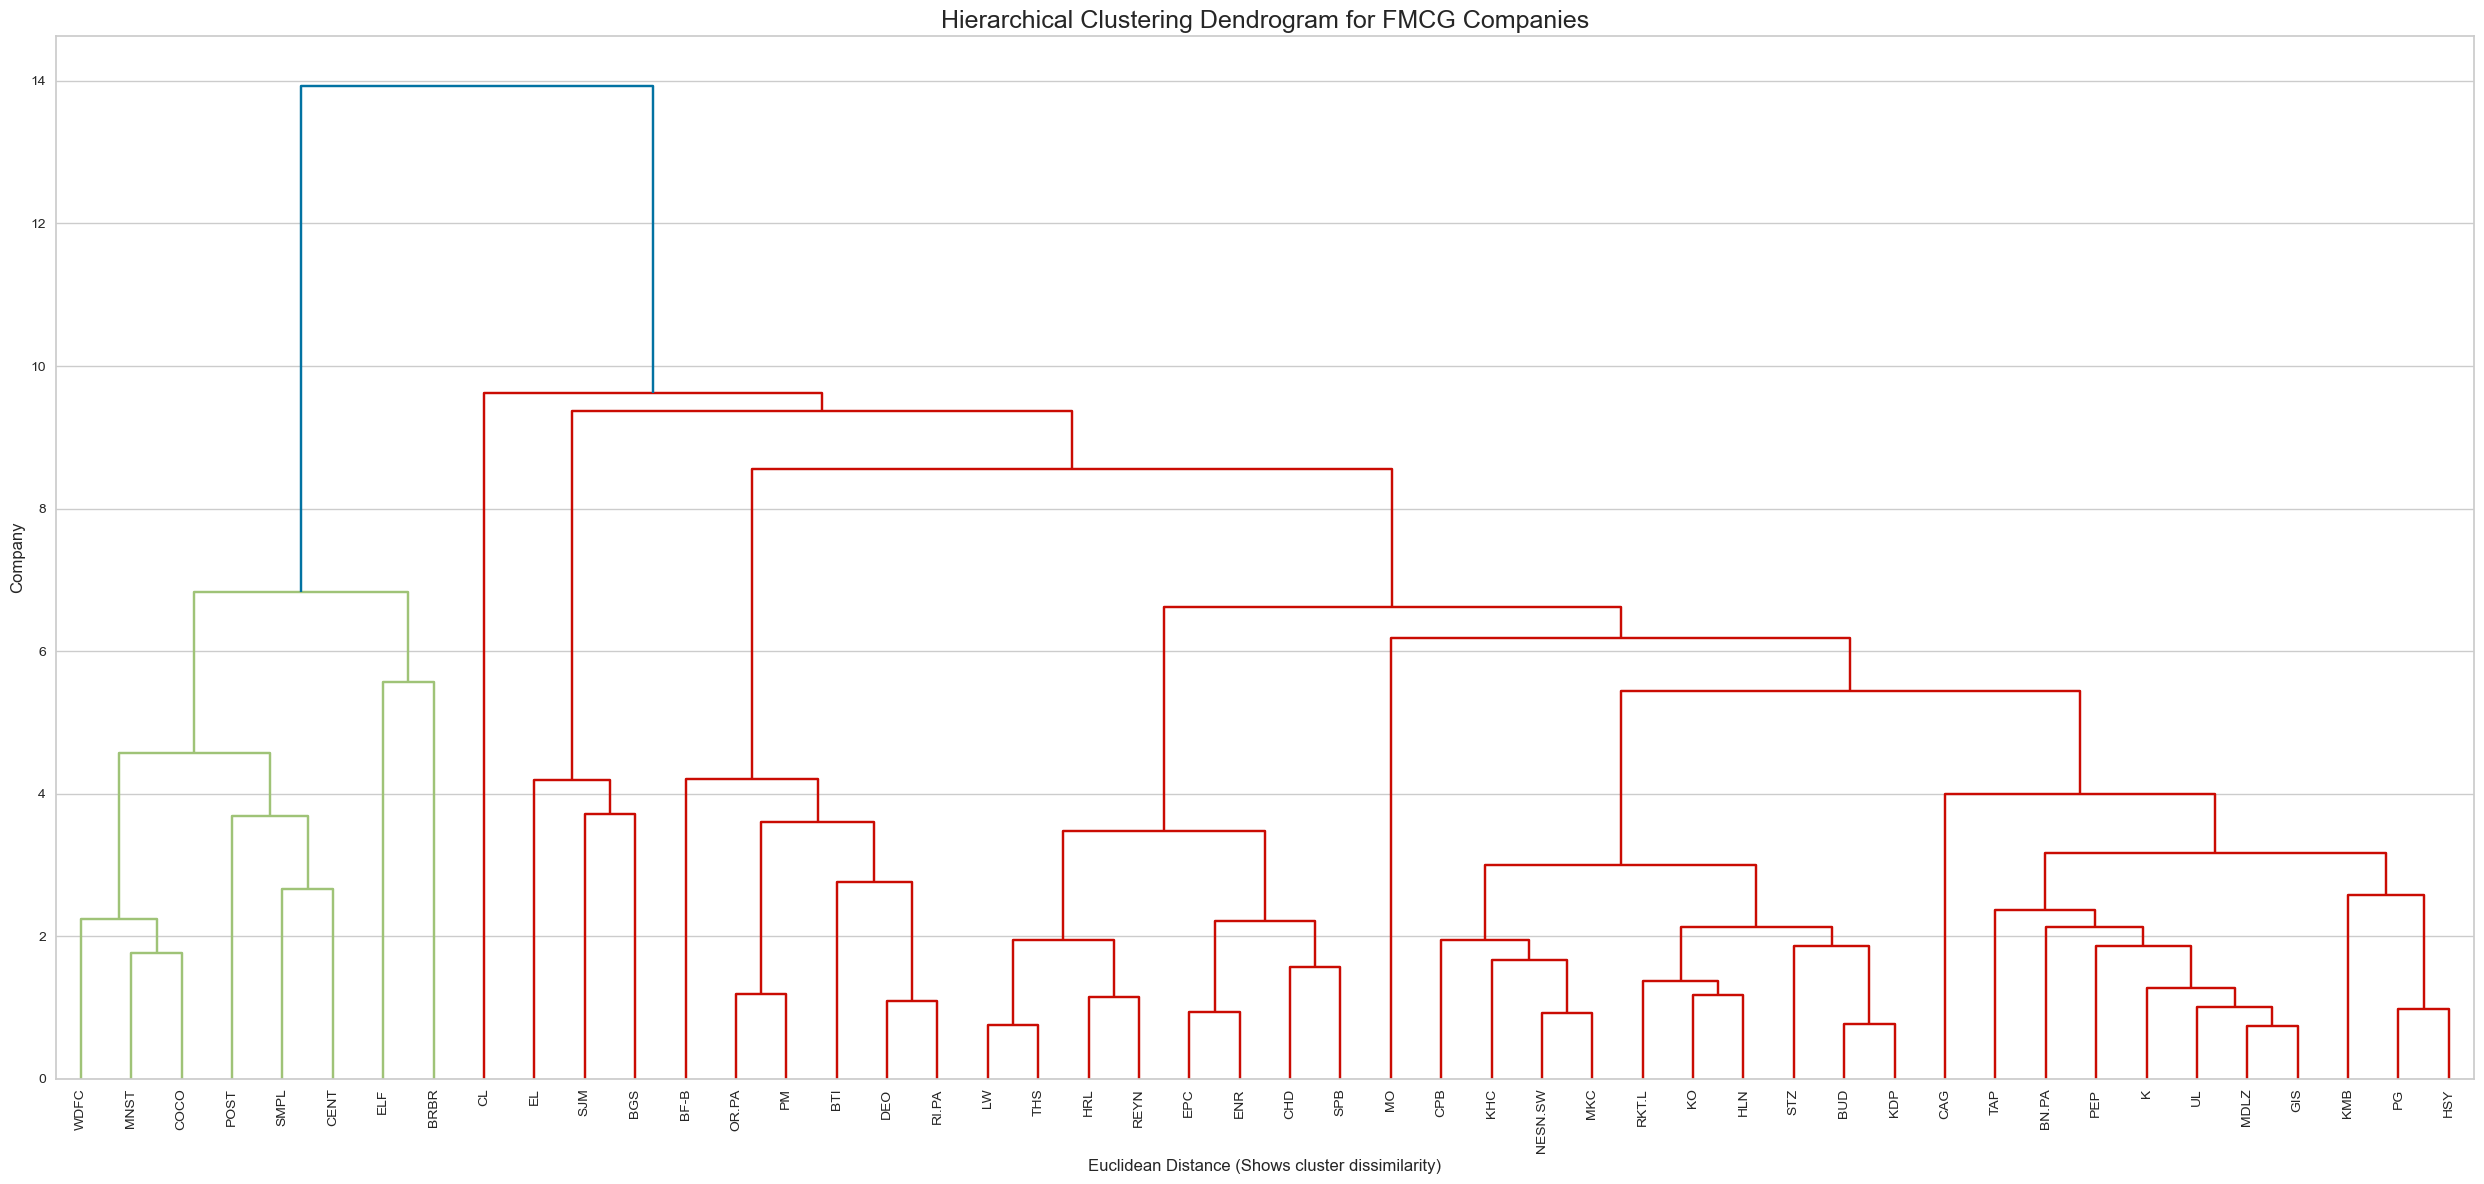


Dendrogram plot has been generated and saved as 'agglomerative_dendrogram.png'.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


# --- Select and Scale Features ---
# Using a balanced set of ratios for clustering
ratios_to_use = ['ROE','ROA','Current_Ratio','Quick_Ratio','Revenue_Growth','EPS_Growth','Asset Turnover','Inventory Turnover', 'Gross Profit Margin']
features_df = features_df[ratios_to_use].copy()
features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
features_df.dropna(inplace=True)

# Scale the data for distance-based clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# --- Generate Linkage Matrix for Clustering ---
# The 'ward' method minimizes the variance within each cluster, creating tight and well-separated groups.
linkage_matrix = linkage(scaled_features, method='ward')

# --- Plot the Dendrogram ---
plt.figure(figsize=(25, 12))  # Use a wide figure to space out the company names

# Create the dendrogram
dendrogram(
    linkage_matrix,
    labels=features_df.index,
    leaf_rotation=90,  # Rotate company names for readability
    leaf_font_size=10
)

plt.title('Hierarchical Clustering Dendrogram for FMCG Companies', fontsize=18)
plt.xlabel('Euclidean Distance (Shows cluster dissimilarity)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.grid(axis='x') # Add a grid to help judge distances
plt.tight_layout()
plt.savefig('agglomerative_dendrogram.png') # Save the plot to a file
plt.show()

print("\nDendrogram plot has been generated and saved as 'agglomerative_dendrogram.png'.")

Several companies (e.g., WDFC, MNST, POST, COCO, SMPL, GENT, ELF, BRBR) cluster together early, indicating highly similar ratios and possibly similar operating models or market focus.

Other clusters (e.g., those eventually joining at a greater distance, such as PG, KMB, GIS, MDLZ, K, PEP) represent groups with distinct financial characteristics.



## 8. Outlier Detection using DBScan 

In [32]:

# Outlier Detection using DBSCAN
from sklearn.cluster import DBSCAN

print("\nDetecting outliers with DBSCAN...")
dbscan = DBSCAN(eps=2.0, min_samples=3)
features_df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)
outliers = features_df[features_df['DBSCAN_Cluster'] == -1]
print(f"DBSCAN identified {len(outliers)} outlier(s).")
if not outliers.empty:
    print("Outlier Company Tickers:\n", outliers.index.tolist())


Detecting outliers with DBSCAN...
DBSCAN identified 16 outlier(s).
Outlier Company Tickers:
 ['BTI', 'MO', 'CL', 'EL', 'MNST', 'SJM', 'BF-B', 'CAG', 'ELF', 'POST', 'BRBR', 'SMPL', 'COCO', 'BGS', 'WDFC', 'CENT']


### The following companies are identified as outliers based on the DBScan 

 ['BTI', 'MO', 'CL', 'EL', 'MNST', 'SJM', 'BF-B', 'CAG', 'ELF', 'POST', 'BRBR', 'SMPL', 'COCO', 'BGS', 'WDFC', 'CENT']

##  9. Segementation

### Principal Component Analysis

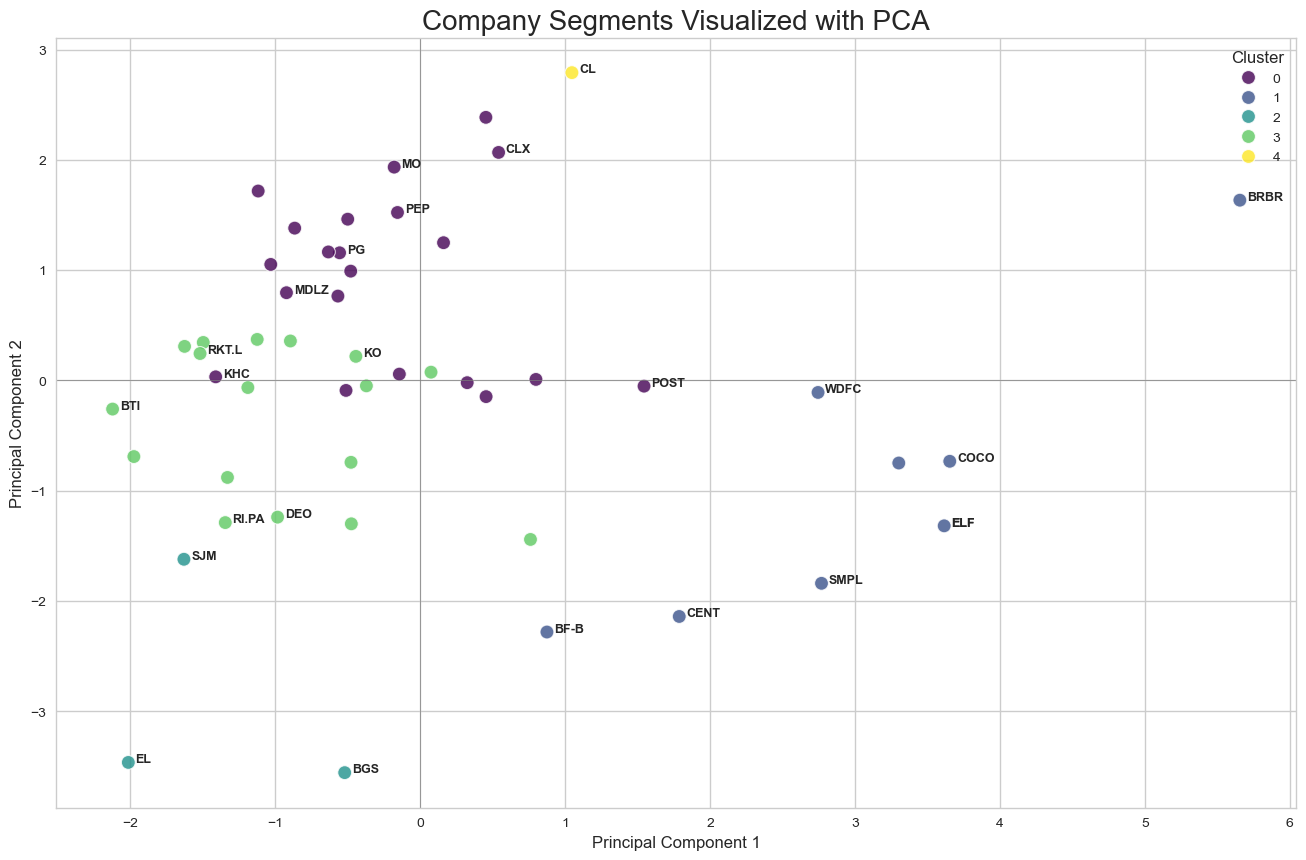

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Train the K-Means model with your chosen number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_df)

# --- Apply PCA ---

# Reduce the 9 dimensions to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data = principal_components, 
                      columns = ['PC1', 'PC2'], 
                      index = scaled_df.index)
pca_df['Cluster'] = cluster_labels

# ---  Create the Scatter Plot ---

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))

# Create the scatter plot, coloring points by their cluster
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', 
                palette='viridis', s=100, alpha=0.8, legend='full')

# --- (Optional but Recommended) Add Labels for Key Companies ---
# Adding too many labels makes the plot unreadable. Just label a few well-known ones.
tickers_to_label = ['PG', 'KO', 'PEP', 'MDLZ', 'CLX', 'ELF', 'KHC','RKT.L','DEO', 'BTI', 'MO', 'CL', 'EL', 'RI.PA', 'SJM', 'BF-B', 'ELF', 'POST', 'BRBR', 'SMPL', 'COCO', 'BGS', 'WDFC', 'CENT']
for ticker in tickers_to_label:
    if ticker in pca_df.index:
        plt.text(pca_df.loc[ticker, 'PC1'] + 0.05, 
                 pca_df.loc[ticker, 'PC2'], 
                 ticker,
                 fontdict={'weight': 'bold', 'size': 9})

plt.title('Company Segments Visualized with PCA', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.savefig('PCA_FMCG_Segments.png')
plt.show()

#### **Cluster 0 and 2 (Purple and Green) : Core Segnment**
 * Most of the companies are concentrated in these clusters near the origin.
 * Industry giants such as Procter & Gamble (PG),  The Coca-Cola Company (KO), PespiCo, Inc.(PEP), Mondelez International (MDLZ) are present in this
 * Represents stable, mature companies with comparable finaincial health and operating ratios.

#### Cluster 1 (Blue): Growth/Disruptor Segment **
* Companies farthest right (high PC1 scores)
* Companies like WD-40 Company(WDFC), The Vita Coco Company, Inc.(COCO),  e.l.f. Beauty, Inc.(ELF), The Simply Good Foods Company (SMPL) etc. are present in this cluster
* Their financial ratios distinguish them from core FMCG - higher growth, niche businesses.

#### Cluster 4 (Yellow): Unique Outlier**
* Colgate-Palmolive Company (CL) stands alone at the top—its financial structure is markedly different from others and deserves special attention. It may reflect a company with exceptionally high margins or singular operational traits, as evidenced by its high Current Ratio and Quick Ratio.

#### Cluster 3(Turquoise): Divergent Segment
* These Companies are scattered mostly on the left and lower regions of PC1 and PC2
* Companies like The Estée Lauder Companies Inc (EL), British American Tobacco p.l.c (BTI), Diageo plc (DEO), Reckitt Benckiser Group plc (RKT.L)
* These companies exhibit profitability challenges, slow growth or operational inefficiencies

#### Outliers from DBSCAN and PCA Alignment
* PCA confirms several outliers identified by DBSCAN: EL, BGS, BRBR, CL, WDFC, COCO, ELF, SMPL, CENT, POST, and others
* These companies appear away from the central cluster mass in the PCA space